In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.DataFrame({"price":[100,200,240,50,80,250,320,360,210,300],
               'order':[1000,2000,2400,3000,2080,1600,3100,3500,1900,3000]})
df

,price,order
0,100,1000
1,200,2000
2,240,2400
3,50,3000
4,80,2080
5,250,1600
6,320,3100
7,360,3500
8,210,1900
9,300,3000


In [3]:
x=df['order'].values.reshape(-1,1)
y=df['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=200,test_size=0.25)

lr=LinearRegression()

lr=lr.fit(x_train,y_train)

y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

r2_pred=r2_score(y_train_pred,y_train)
r2_test=r2_score(y_test_pred,y_test)

print("r2 for train data",r2_pred)
print("r2 for test data",r2_test)


r2 for train data 0.7517084014001002
r2 for test data -4.21917579452527


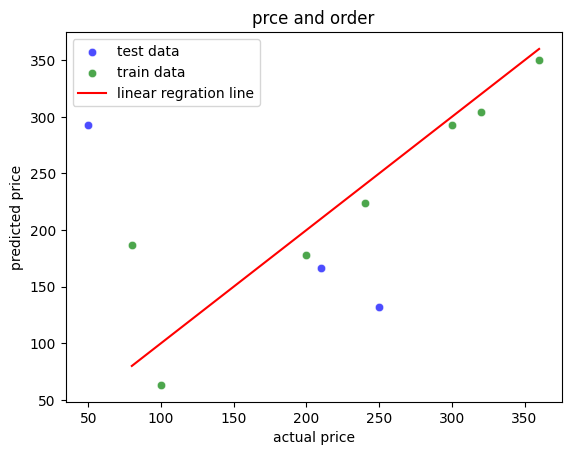

In [4]:
sns.scatterplot(x=y_test,y=y_test_pred,color='blue',alpha=0.7,label='test data')
sns.scatterplot(x=y_train,y=y_train_pred,color='green',alpha=0.7,label='train data')
sns.lineplot(x=[y_train.min(),y_train.max()],y=[y_train.min(),y_train.max()],color='red',label="linear regration line")
plt.xlabel("actual price")
plt.ylabel('predicted price')
plt.title("prce and order")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset
data = {
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X2': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Y': [3, 6, 7, 10, 13, 15, 18, 21, 23, 26]
}

df = pd.DataFrame(data)

# Splitting into independent and dependent variables
X = df[['X1', 'X2']]
y = df['Y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


In [7]:

data = {
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X2': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Y': [3, 6, 7, 10, 13, 15, 18, 21, 23, 26]
}

df = pd.DataFrame(data)

In [19]:
x=df[['X1','X2']]
y=df['Y']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=0.25)


In [21]:
multi_lr=LinearRegression()
multi_lr=multi_lr.fit(x_train,y_train)

In [25]:
y_train_pred=multi_lr.predict(x_train)
y_test_pred=multi_lr.predict(x_test)

In [26]:
r2_train=r2_score(y_train,y_train_pred)
r2_test=r2_score(y_test,y_test_pred)

print("train",r2_train)
print("test",r2_test)

train 0.9984406398730831
test 0.9844126929561583


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load dataset (California Housing dataset)
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target  # Target variable

# Selecting features (independent variables) and target (dependent variable)
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Function to take user input and predict house price
def predict_house_price():
    print("\nEnter the details of the house to predict the price:")
    
    MedInc = float(input("Median Income in Block ($): "))
    HouseAge = float(input("Age of House (years): "))
    AveRooms = float(input("Average Number of Rooms: "))
    AveBedrms = float(input("Average Number of Bedrooms: "))
    Population = float(input("Population in Block: "))
    AveOccup = float(input("Average Occupancy per Household: "))
    Latitude = float(input("Latitude: "))
    Longitude = float(input("Longitude: "))
    
    # Convert input into a NumPy array and reshape
    user_data = np.array([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]])
    
    # Predict price
    predicted_price = model.predict(user_data)
    
    print(f"\nPredicted House Price: ${predicted_price[0] * 100000:.2f}")  # Scaling the output to USD

# Call function to get user input and predict house price
predict_house_price()



Enter the details of the house to predict the price:
Median Income in Block ($): 20000
Age of House (years): 5
Average Number of Rooms: 3
Average Number of Bedrooms: 1
Population in Block: 10
Average Occupancy per Household: 20000
Latitude: 1010
Longitude: 1021

Predicted House Price: $799960397.60


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.023277706064064
Mean Squared Error (MSE): 0.555891598695244
Root Mean Squared Error (RMSE): 0.7455813830127761
R² Score: 0.5757877060324511


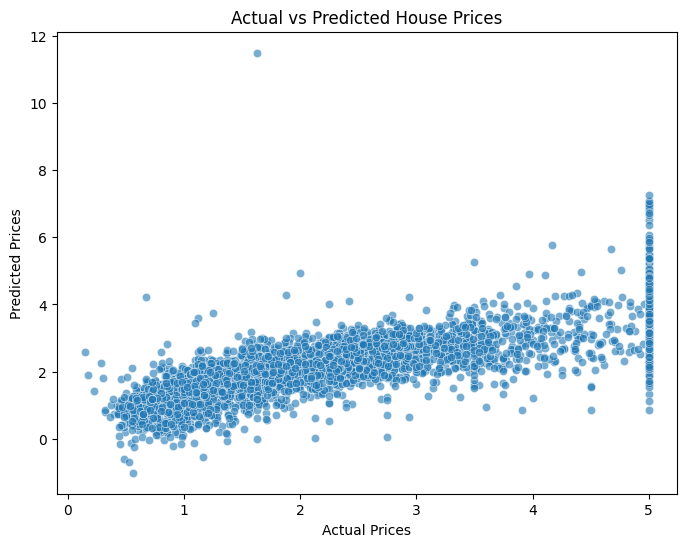

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (Example: Boston Housing Dataset)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target  # Target variable

# Checking dataset info
print(df.head())

# Selecting features (independent variables) and target (dependent variable)
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Visualizing predictions vs actual prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
